# Image Captioning

## Introduction

Image captioning is a popular research area of Artificial Intelligence (AI) that deals with image understanding and a language description for that image. Image understanding needs to detect and recognize objects. It also needs to understand scene type or location, object properties and their interactions. Generating well-formed sentences requires both syntactic and semantic understanding of the language.

Image captioning is important for many reasons. For example, they can be used for automatic image indexing. Image indexing is important for Content-Based Image Retrieval (CBIR) and therefore, it can be applied to many areas, including biomedicine, commerce, the military, education, digital libraries, and web searching. Social media platforms such as Facebook and Twitter can directly generate descriptions from images. 

Understanding an image largely depends on obtaining image features. The techniques used for this purpose can be broadly divided into two categories: (1) Traditional machine learning based techniques and (2) Deep machine learning based techniques.

In this project we will use a Deep learning based technique using Encoder-Decoder Architecture. 




## Data 
A number of datasets are used for training, testing, and evaluation of the image captioning methods. The datasets differ in various perspective such as the number of images, the number of captions per image, format of the captions, and image size. Three datasets: Flickr8k, Flickr30k, and MS COCO Dataset are popularly used.

### MS COCO Dataset. 

Microsoft COCO Dataset [1] is a very large dataset for image recognition, segmentation, and captioning. There are various features of MS COCO dataset such as object segmentation, recognition in context, multiple objects per class, more than 300,000 images, 80 object categories, and 5 captions per image. Many image captioning
Methods use the dataset in their experiments. 

url: http://cocodataset.org/#download

#### Annotations: 

2014 Train/Val annotations [241MB]

2014 Testing Image info [1MB]

#### Images: 

2014 Train images [83K/13GB]

2014 Val images [41K/6GB]

2014 Test images [41K/6GB]


## Approach 

### Encoder-Decoder Architecture-Based Image captioning

We use a Deep learning based technique using Encoder-Decoder Architecture. 
The neural network-based image captioning methods are very similar to the encoder-decoder framework-based neural machine translation. In this network, global image features are extracted from the hidden activations of CNN and then fed them into an LSTM to generate a sequence of words.

A typical method of this category has the following general steps:

(1) A vanilla CNN is used to obtain the scene type, to detect the objects and their relationships.

(2) The output of Step 1 is used by a language model to convert them into words, combined
phrases that produce an image captions.

#### Architecture
 CNN-RNN (EncoderCNN-DecoderRNN) model is based on the model proposed in the paper "Show and Tell: A Neural Image Caption Generator" ( https://arxiv.org/pdf/1411.4555.pdf). Below figure adapted from the paper shows a LSTM model combined with a CNN (ResNet152) image embedder and word embeddings. The unrolled connections between the LSTM memories are in blue and they correspond to the recurrent connections. All LSTMs share the same parameters.
![title](images/ResNet152_LSTM.png)

Below figures are from the paper:- An Analysis of Deep Neural Network Models for Practical Applications.
(https://arxiv.org/pdf/1605.07678.pdf)
 

![title](images/TopCNNNetworks.png)

Figure 1 shows one-crop accuracies of the most relevant entries submitted to the ImageNet challenge,
from the AlexNet (Krizhevsky et al., 2012), on the far left, to the best performing Inception-v4
(Szegedy et al., 2016). 

Figure 2 provides a different, but more informative view of the accuracy values, because it also
visualises computational cost and number of network’s parameters.

Since the newest ResNet and Inception architectures surpass all other architectures
by a significant margin of at least 7% (top 1 validation accuracy), Resnet152 was chosen as the CNN architecture in the EncoderCNN.  ResNet uses what's called a residual module to train CNNs to depths previously thought impossible. The residual Module was first introduced by He et al. in their 2015 paper, Deep Residual Learning for Image Recognition.

LSTM was chosen for the DecoderRNN because of its its ability to deal with vanishing and exploding gradients (S. Hochreiter and J. Schmidhuber. Long short-term memory. Neural Computation, 9(8), 1997.) LSTM has also been applied with great success to translation and sequence generation.
LSTM with one recurrent layer was used (num_layers=1).



#### Evaluation Metrics

##### BLEU

BLEU (Bilingual evaluation understudy) is a metric that is used to measure
the quality of machine generated text. Individual text segments are compared with a set of reference texts and scores are computed for each of them. In estimating the overall quality of the generated text, the computed scores are averaged. However, syntactical correctness is not considered here. The performance of the BLEU metric is varied depending on the number of reference translations and the size of the generated text. BLEU is popular because it is a pioneer in automatic evaluation of machine translated text and has a reasonable correlation with human judgements of quality. However, it has a few limitations such as BLEU scores are good only if the generated text is short. 

A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.

The BLEU score was proposed by Kishore Papineni, et al. in their 2002 paper BLEU: a
Method for Automatic Evaluation of Machine Translation. The approach works by counting
matching n-grams in the candidate translation to n-grams in the reference text, where 1-gram
or unigram would be each token and a bigram comparison would be each word pair. The
comparison is made regardless of word order.

The primary programming task for a BLEU implementor is to compare n-grams of
the candidate with the n-grams of the reference translation and count the number
of matches. These matches are position-independent. The more the matches, the
better the candidate translation is.
— BLEU: a Method for Automatic Evaluation of Machine Translation, 2002.


###### Cumulative n-gram Scores

Cumulative scores refer to the calculation of individual n-gram scores at all orders from 1 to n and
weighting them by calculating the weighted geometric mean. 

For example the weights for the cumulative 4-gram BLEU score, also called BLEU-4 are:
are 1/4 (25%) or 0.25 for each of the 1-gram, 2-gram, 3-gram and 4-gram scores. 

The cumulative and individual 1-gram BLEU use the same weights, e.g. (1, 0, 0, 0). The
2-gram weights assign a 50% to each of 1-gram and 2-gram and the 3-gram weights are 33%
for each of the 1, 2 and 3-gram scores.


## Training Setup

Customize the training of the CNN-RNN model by specifying hyperparameters and setting other options that are important to the training procedure:

- `batch_size` - the batch size of each training batch.  It is the number of image-caption pairs used to amend the model weights in each training step. 
- `vocab_threshold` - the minimum word count threshold.  Note that a larger threshold will result in a smaller vocabulary, whereas a smaller threshold will include rarer words and result in a larger vocabulary.  
- `vocab_from_file` - a Boolean that decides whether to load the vocabulary from file. 
- `embed_size` - the dimensionality of the image and word embeddings.  
- `hidden_size` - the number of features in the hidden state of the RNN decoder.  
- `num_epochs` - the number of epochs to train the model. 

- `save_every` - determines how often to save the model weights.  

- `print_every` - determines how often to print the batch loss to the Jupyter notebook while training. 

- `log_file` - the name of the text file containing - for every step - how the loss and perplexity evolved during training.



#### Training Params

##### batch_size
batch_size = 128          # batch size

The suggested batch sizes are: 1, 2, 4, 8, 16, 32, 64, 128, 256 .. from the reference paper: Systematic evaluation of CNN advances on the ImageNet. 
I started with smaller batch sizes (ex: 32) and increased it to 128 resulting in reduced training time. I adjusted the learning rate to lr=0.005 - calculated based on the heuristic 0.01 * batch_size/256 (batch_size=128) (reference paper: Systematic evaluation of CNN advances on the ImageNet)

##### vocab_threshold
vocab_threshold = 4        # minimum word count threshold

With vocab_threshold set to 4, the total number of tokens in vocabulary is: 9955, which is reasonable. 


##### embed_size/hidden_size

- embed_size = 512           # dimensionality of image and word embeddings
- hidden_size = 512          # number of features in hidden state of the RNN decoder

512 dimensions for the embed_size/hidden_size was chosen based on the settings chosen in the Paper "Show and Tell" in their Training section.

##### num_epochs
num_epochs = 3             # number of training epochs

Initial experiments were conducted with num_epochs = 1. After appropriate model/hyperparams were chosen the num_epochs was increased to 3.



### Data Augmentation

The recommended transforms conform to those mentioned in the ResNet paper - Deep Residual Learning for Image Recognition (input image size - 224 X 224 ) Since we were using ResNet architecture for the EncoderCNN, the transform_train transforms were used as is. 


By applying transformations to the training data, we are adding additional variations without the cost of collecting and annotating more data. This can help with reducing overfitting and improving model's ability to generalize. 

Transforming an image by flipping produces an equally recognizable mirror image.Horizontal flipping is preferred over Vertical based on the data.

One of the benefits of Random cropping is, it can act as a regularizer.


### Trainable Parameters

params = list(decoder.parameters()) + list(encoder.embed.parameters()) + list(encoder.bn.parameters())

Encoder:
Since we are using a pretrained ResNet152 model for the Encoder, only the parameters for the linear layer and Batch Normalization are selected.

default pytorch function: torch.nn.Linear(in_features, out_features, bias=True)
Variables:	
- weight – the learnable weights of the module of shape (out_features x in_features)
- bias – the learnable bias of the module of shape (out_features)

default pytorch function: torch.nn.BatchNorm1d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Applies Batch Normalization over a 2D or 3D input (a mini-batch of 1D inputs with optional additional channel dimension) as described in the paper "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift" .

The mean and standard-deviation are calculated per-dimension over the mini-batches and γ and β are learnable parameter vectors of size C (where C is the input size).

Decoder: 
All the parameters in the decoder are considered as we are training from scratch.

### Optimizer


Optimization function used: Adam

 Karpathy (http://cs231n.github.io/neural-networks-3/) recommends to try Adam and SGD+Nesterov Momentum as an alternative for CNN Networks. Also, Adam was used for Flickr30k/MS COCO dataset in the paper - Show, Attend and Tell (https://arxiv.org/pdf/1502.03044.pdf) 

I used Adam with learning rate lr = 0.005 

Default values were used for other params, ex:

torch.optim.Adam(params, lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

learning rate 0.005 was calculated based on the heuristic 0.01 * batch_size/256 (batch_size=128 ) (reference paper: Systematic evaluation of CNN advances on the ImageNet)

Adaptive learning rate methods seek to improve on SGD (Stochastic Graident Descent) to optimize the networks by 1) reducing the amount of time(No. of epochs) to obtain reasonable accuracy 2) adaptively tune for a range of hyperparameters other than the learning rate ..etc

The Adam (Adaptive Moment Estimation) optimization algorithm is an Adaptive Learning Rate method, proposed by Kingma and Ba in their 2014 paper, Adam: A Method for Stochastic Optimization ((https://arxiv.org/abs/1412.6980). Adam is essentially RMSprop only with momentum added to it.

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN
import math




## TODO #1: Select appropriate values for the Python variables below.
batch_size = 128          # batch size
vocab_threshold = 4        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 512           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log_resnet152_ep3.txt'       # name of file with saved training loss and perplexity

# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters()) + list(encoder.bn.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params, lr=0.005)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=1.25s)
creating index...


  0%|          | 526/414113 [00:00<01:18, 5255.36it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:53<00:00, 7730.57it/s]



## Model Training

In [3]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()


for epoch in range(1, num_epochs+1):
    
    epoch_start = time.time()
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
 
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-%d.pkl' % epoch))
        
    epoch_time_elapsed = time.time() - epoch_start
    print("Epoch: {}/{}".format(epoch, num_epochs),  ' time {:.0f}m {:.0f}s'.format(
        epoch_time_elapsed // 60, epoch_time_elapsed % 60))

# Close the training log file.
f.close()

Epoch [1/3], Step [100/3236], Loss: 3.1742, Perplexity: 23.9087
Epoch [1/3], Step [200/3236], Loss: 2.6866, Perplexity: 14.6821
Epoch [1/3], Step [300/3236], Loss: 2.6014, Perplexity: 13.4821
Epoch [1/3], Step [400/3236], Loss: 2.4139, Perplexity: 11.1777
Epoch [1/3], Step [500/3236], Loss: 2.6487, Perplexity: 14.1350
Epoch [1/3], Step [600/3236], Loss: 2.3542, Perplexity: 10.5297
Epoch [1/3], Step [700/3236], Loss: 3.0300, Perplexity: 20.6976
Epoch [1/3], Step [800/3236], Loss: 2.2848, Perplexity: 9.82394
Epoch [1/3], Step [900/3236], Loss: 2.3845, Perplexity: 10.85381
Epoch [1/3], Step [1000/3236], Loss: 2.1885, Perplexity: 8.9216
Epoch [1/3], Step [1100/3236], Loss: 2.4193, Perplexity: 11.2385
Epoch [1/3], Step [1200/3236], Loss: 2.0605, Perplexity: 7.85024
Epoch [1/3], Step [1300/3236], Loss: 2.4062, Perplexity: 11.0918
Epoch [1/3], Step [1400/3236], Loss: 2.3273, Perplexity: 10.25049
Epoch [1/3], Step [1500/3236], Loss: 2.0910, Perplexity: 8.09273
Epoch [1/3], Step [1600/3236], Lo

### Plot of Loss and Perplexity with Number of Iterations

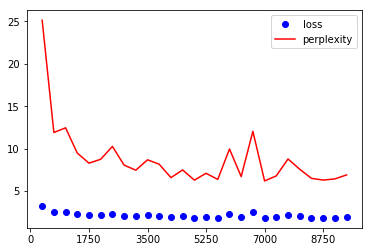

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
log_file = 'training_log_resnet152_ep3.txt'


loss = []
perplexity = []

with open(log_file, "r") as log:
   for line in log.readlines():
       values = [float(s) for s in re.findall(r'\d+\.\d*', line)]
       loss.append(values[0])
       perplexity.append(values[1])
        

loss_s = loss[350::350]
perplexity_s = perplexity[350::350]


def format_func(value, tick_number):
    return int(value*350)

fig, ax = plt.subplots()
        
plt.plot(range(1,len(loss_s)+1),loss_s,'bo',label = 'loss')
plt.plot(range(1,len(perplexity_s)+1),perplexity_s,'r',label = 'perplexity')
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.legend()
plt.show()

In [4]:
print(np.min(loss))
print(np.min(perplexity))

print(np.max(loss))
print(np.max(perplexity))

1.6496
5.2051
9.2047
9943.6649



## Model Validation


### Data Loader for Validation Dataset

In [1]:
#Validate model.
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader_val import get_loader_val
from torchvision import transforms

transform_test = transforms.Compose([transforms.Resize((224, 224)), 
                                     transforms.ToTensor(), 
                                     transforms.Normalize((0.485, 0.456, 0.406), 
                                                          (0.229, 0.224, 0.225))])

# Build data loader (validation images)
#batch_size=1
data_loader_test = get_loader_val(transform=transform_test,
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


#### Sample Image

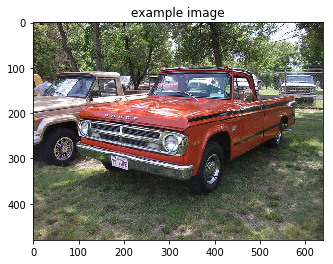

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image, id = next(iter(data_loader_test))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()


In [7]:
print(id)

tensor([148719])


###  Load Trained Models

In [2]:
# Watch for any changes in model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Specify the saved models to load.
encoder_file = 'encoder-3.pkl' 
decoder_file = 'decoder-3.pkl'

embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader_test.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

DecoderRNN(
  (embedding): Embedding(9956, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=9956, bias=True)
)

### Test Sampler

In [17]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader_test.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 174, 64, 130, 900, 54, 32, 33, 18, 1]


### Caption cleanup

In [18]:

import re
def clean_sentence(output):
    words = []
    
    for index in output:
        words.append(data_loader_test.dataset.vocab.idx2word[index])
    
    #Strip <start> and <end>
    words = words[1:-1]
    sentence = ' '.join(map(str, words)).capitalize()
    sentence = re.sub(r'\s([?,.!"](?:\s|$))', r'\1', sentence)
    return sentence

In [19]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: A bus that is driving down the street.


### Generate captions

In [20]:
import json


results = []

for i, (o_img, img, img_id) in enumerate(data_loader_test):
        
    img = img.to(device)
    # Obtain the embedded image features.
    features = encoder(img).unsqueeze(1)

    # Pass the embedded image features through the model to get a predicted caption.
    output = decoder.sample(features)
    
    assert (type(output)==list), "Output needs to be a Python list" 
    assert all([type(x)==int for x in output]), "Output should be a list of integers." 
    assert all([x in data_loader_test.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."
    
    sentence = clean_sentence(output)

    assert type(sentence)==str, 'Sentence needs to be a Python string!'
    
    temp = { 'image_id': int(img_id), 'caption': sentence }
    results.append( temp )
        
    # Display evaluation process
    if (i+1) % 5000 == 0:
        print('example output:', output)
        print('example sentence:', sentence)
        print('[%d/%d]'%( (i+1),len(data_loader_test) )) 
        

print("Caption Generated")
            

#Save generated captions
resFile = 'results_resnet152_ep3' + '.json'
json.dump( results, open( resFile , 'w' ) )
    

example output: [0, 3, 33, 566, 21, 3, 29, 30, 6, 3, 523, 18, 1]
example sentence: A street corner with a stop sign and a building.
[5000/40504]
example output: [0, 3, 335, 35, 906, 21, 3, 35, 983, 36, 39, 46, 18, 1]
example sentence: A large red truck with a red sports car on it.
[10000/40504]
example output: [0, 3, 84, 407, 170, 77, 3, 1402, 18, 1]
example sentence: A brown bear standing in a forest.
[15000/40504]
example output: [0, 3, 2359, 1573, 1351, 3, 4183, 111, 3, 353, 1]
example sentence: A baseball player swinging a bat at a ball
[20000/40504]
example output: [0, 3, 169, 130, 355, 918, 77, 3, 511, 18, 1]
example sentence: A man is playing soccer in a crowd.
[25000/40504]
example output: [0, 3, 957, 363, 360, 3, 322, 323, 77, 3, 325, 18, 1]
example sentence: A little girl holding a stuffed animal in a bed.
[30000/40504]
example output: [0, 3, 1946, 64, 130, 170, 39, 3, 772, 18, 1]
example sentence: A bird that is standing on a tree.
[35000/40504]
example output: [0, 3, 98, 13

### Evaluate results on MS-COCO validation dataset

Evaluation metrics (BLEU,ROUGE_L, CIDEr) were calculated using code from: https://github.com/tylin/coco-caption.
Note: coco-caption was renamed to cococaption in the home directory. Also, the relevant python files in the cococaption folder were converted to support Python 3.x. 

In [24]:
from cococaption.pycocotools.coco import COCO
from cococaption.pycocoevalcap.eval import COCOEvalCap

annFile = 'cococaption/annotations/captions_val2014.json'

# Evaluate the results based on the COCO API
coco = COCO(annFile)
cocoRes = coco.loadRes( resFile )
    
cocoEval = COCOEvalCap( coco, cocoRes)
cocoEval.params['image_id'] = cocoRes.getImgIds() 
cocoEval.evaluate()
    
# BLEU, ROUGE_L, CIDEr scores for validation evaluation
print("-----------Evaluation performance on MS-COCO validation dataset")
for metric, score in cocoEval.eval.items():     
        print ('%s: %.4f'%( metric, score ))
    

loading annotations into memory...
0:00:00.311384
creating index...
index created!
Loading and preparing results...     
DONE (t=0.07s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 385426, 'reflen': 383024, 'guess': [385426, 344922, 304418, 263914], 'correct': [250823, 108637, 44198, 18773]}
ratio: 1.0062711474998929
Bleu_1: 0.651
Bleu_2: 0.453
Bleu_3: 0.310
Bleu_4: 0.214
computing Rouge score...
ROUGE_L: 0.458
computing CIDEr score...
CIDEr: 0.562
-----------Evaluation performance on MS-COCO validation dataset
Bleu_1: 0.6508
Bleu_2: 0.4527
Bleu_3: 0.3099
Bleu_4: 0.2145
ROUGE_L: 0.4580
CIDEr: 0.5622


To evaluate the skill of the model using BLEU scores:

For reference, below are some ball-park BLEU scores for skillful models when evaluated on the test dataset (taken from the 2017 paper - Where to put the Image
in an Image Caption Generator ) :
* BLEU-1: 0.401 to 0.578.
* BLEU-2: 0.176 to 0.390.
* BLEU-3: 0.099 to 0.260.
* BLEU-4: 0.059 to 0.170.

The obtained BLEU scores outperform the ball park BLEU scores. 

### Conclusions and Future Work

In this Image Captioning project, we implemented a Deep learning based technique using Encoder-Decoder Architecture. We have shown our calculated Evaluation Metric - BLEU scores, outperformed the reference BLEU scores.

In their paper - BLEU: a Method for Automatic Evaluation of Machine Translation, the authors quote -

The BLEU metric ranges from 0 to 1. Few translations will attain a score of 1 unless they are identical to a reference translation. For this reason, even a human translator will not necessarily score 1. […] on a test corpus of about 500 sentences (40 general news stories), a human translator scored 0.3468 against four references and scored 0.2571 against two references.

Future improvements to investigate further: 

1) Beam Search as an approximate search (often works better than the greedy approach)

2) Implement other models like attention based model (Show, Attend and Tell: Neural Image Caption Generation with Visual Attention )


## References

[1] Tsung-Yi Lin, Michael Maire, Serge Belongie, James Hays, Pietro Perona, Deva Ramanan, Piotr DollÃąr, and C Lawrence Zitnick. 2014. Microsoft coco: Common objects in context. In European conference on computer vision. Springer, 740–755.

[2] Qi Wu, Chunhua Shen, Anton van den Hengel, Lingqiao Liu, and Anthony Dick. 2015. Image captioning with an intermediate attributes layer. arXiv preprint arXiv:1506.01144 (2015)

[3] Oriol Vinyals, Alexander Toshev, Samy Bengio, and Dumitru Erhan. 2015. Show and tell: A neural image caption generator. In Proceedings of the IEEE conference on computer vision and pattern recognition. 3156–3164.

[4] Hamid Laga ...et al. A Comprehensive Survey of Deep Learning for Image Captioning, 2018 (https://arxiv.org/abs/1810.04020) 

[5] Kishore Papineni, et al. BLEU: a Method for Automatic Evaluation of Machine Translation, 2002.

[6] Alfredo Canziani & Eugenio Culurciello, Adam Paszke,An Analysis of Deep Neural Network Models for Practical Applications. 2018. 

[7] Kelvin Xu, et al. Show, Attend and Tell: Neural Image Caption Generation with Visual Attention

[8] Diederik P. Kingma, Jimmy Ba. Adam: A Method for Stochastic Optimization

[9] Marc Tanti, et al. Where to put the Image in an Image Caption Generator